### Introduction to scikit-learn(sklearn)

0. An end to end scikit-learn workflow
1. Get the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improve the model
6. Save and load the trained model
7. Putting it all together

# 0. An end to end scikit-learn workflow

In [317]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('../heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [318]:
# Create X (feature matrix)
x = heart_disease.drop('target', axis=1)

# Create Y (labels)
y = heart_disease['target']

In [319]:
# 2. Choose the right model/algorithm and hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Create model
clf = RandomForestClassifier()

# Keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [320]:
# 3. Fit the model/algorithm to training the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [321]:
clf.fit(x_train, y_train);

In [322]:
# make prediction
import numpy as np

y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [323]:
y_test

78     1
71     1
152    1
281    0
206    0
      ..
0      1
19     1
282    0
291    0
56     1
Name: target, Length: 61, dtype: int64

In [324]:
# 4. Evaluate the model on training data and testing data
clf.score(x_train, y_train)

1.0

In [325]:
clf.score(x_test, y_test)

0.8032786885245902

In [326]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.89      0.81      0.85        42

    accuracy                           0.80        61
   macro avg       0.77      0.80      0.78        61
weighted avg       0.82      0.80      0.81        61



In [327]:
confusion_matrix(y_test, y_preds)

array([[15,  4],
       [ 8, 34]])

In [328]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [329]:
# 5. Improve the model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)
    score = accuracy_score(y_test, y_preds)
    print(f'Accuracy {score * 100:.2f}% ')
    print('')

Trying model with 10 estimators...
Accuracy 75.41% 

Trying model with 20 estimators...
Accuracy 73.77% 

Trying model with 30 estimators...
Accuracy 75.41% 

Trying model with 40 estimators...
Accuracy 75.41% 

Trying model with 50 estimators...
Accuracy 78.69% 

Trying model with 60 estimators...
Accuracy 78.69% 

Trying model with 70 estimators...
Accuracy 78.69% 

Trying model with 80 estimators...
Accuracy 75.41% 

Trying model with 90 estimators...
Accuracy 77.05% 



In [330]:
# 6. Save and load the model
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [331]:
# load model
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(x_test, y_test)

0.7704918032786885

# 1. Get our data ready to be used with machine learning

three things we need to do:

    1. Split data into features and labels, usually(`X` and `Y`)
    2. Filling(also called imputing) or disregarding missing values
    3. Convert non-numerical values into numerical values(also called feature encoding)

In [332]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [333]:
x = heart_disease.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [334]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [335]:
# split data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [336]:
# car sales example
car_sales = pd.read_csv('../car-sales.csv')
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [337]:
x_car_sales = car_sales.drop('Odometer (KM)', axis=1)
y_car_sales = car_sales['Odometer (KM)']

In [338]:
x_car_train, x_car_test, y_car_train, y_car_test = train_test_split(x_car_sales, y_car_sales, test_size=0.4)
x_car_train.shape, x_car_test.shape, y_car_train.shape, y_car_test.shape

((6, 4), (4, 4), (6,), (4,))

## 1.1 Transform data into numerical data

In [339]:
car_sales = pd.read_csv('../car-sales-extended.csv');
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [340]:
x = car_sales.drop('Price', axis=1)
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [341]:
y = car_sales['Price']
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [342]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [343]:
from sklearn.ensemble import RandomForestRegressor

# error ValueError: could not convert string to float
# model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)

In [344]:
# transform categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], 
                                remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [345]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [346]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [347]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [348]:
# refit model
np.random.seed(42)

model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values
    1. Fill them with some values(AKA imputation)
    2. Remove samples with missing data altogether

In [349]:
# import data
car_sales_missing = pd.read_csv('../car-sales-extended-missing-data.csv')

In [350]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [351]:
x = car_sales_missing.drop('Price', axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [352]:
y = car_sales_missing['Price']
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [353]:
# transform categorical data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# ValueError: Input contains NaN
# categorical_features = ['Make', 'Colour', 'Doors']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
# transformed_x = transformer.fit_transform(x)
# transformed_x

#### Option 1: fill missing value with pandas

In [354]:
# show sum of values that is missing(na)
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [355]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

# Checkout data frame
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [356]:
# Remove row where Price is na
car_sales_missing.dropna(inplace=True)

In [357]:
len(car_sales_missing)

950

In [358]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [359]:
x = car_sales_missing.drop('Price', axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [360]:
y = car_sales_missing['Price']
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [361]:
len(x), len(y)

(950, 950)

In [362]:
x.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
dtype: object

In [363]:
y.dtypes

dtype('float64')

In [364]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [365]:
x_train

,Make,Colour,Odometer (KM),Doors
649,Toyota,Black,86696.000000,4.0
115,Toyota,Black,20714.000000,4.0
359,Toyota,White,134415.000000,4.0
896,Toyota,Green,131253.237895,4.0
364,Honda,White,145850.000000,4.0
...,...,...,...,...
494,Nissan,Blue,111256.000000,4.0
295,Honda,White,246079.000000,4.0
703,Honda,Blue,224900.000000,4.0
652,missing,White,19482.000000,3.0


In [366]:
y_train

649    30320.0
115    30407.0
359     5125.0
896     9073.0
364    17876.0
        ...   
494    10919.0
295    10872.0
703     9104.0
652    31208.0
14     18946.0
Name: Price, Length: 760, dtype: float64

In [367]:
# transform non-numerical values into numercial values on training data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], 
                                remainder='passthrough')
transformed_x_train = transformer.fit_transform(x_train)
transformed_x_train, len(transformed_x_train), len(y_train)

(array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 8.66960e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 2.07140e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.34415e+05],
        ...,
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 2.24900e+05],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 1.94820e+04],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.99833e+05]]),
 760,
 760)

### option 2. fill missing value with Scikit-Learn

In [368]:
car_sales_missing = pd.read_csv('../car-sales-extended-missing-data.csv')

In [369]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [370]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [371]:
# drop row with no label
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [372]:
# split data into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [373]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [374]:
# fill missing value with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical features with 'missing' & door with 4 & odometer with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
odometer_imputer = SimpleImputer(strategy='mean')

# define features
cat_feature = ['Make', 'Colour']
door_feature = ['Doors']
odometer_feature = ['Odometer (KM)']

transformer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_feature),
    ('odometer_imputer', odometer_imputer, odometer_feature),
    ('door_imputer', door_imputer, door_feature)
])

transformed_x = transformer.fit_transform(X)
transformed_x

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [375]:
car_sales_filled = pd.DataFrame(transformed_x, columns=X.columns)
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,missing,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [376]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [377]:
# transform non-numerical values into numercial values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder(sparse=False)
imputer = ColumnTransformer([('one_hot', one_hot, categorical_features)], 
                                remainder='passthrough')
imputed_x = imputer.fit_transform(car_sales_filled)
imputed_x

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

### Scaling features

We use MinMaxScaler to scale our feature

In [378]:
# scale features on training data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.style.use('ggplot')
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(imputed_x)

In [379]:
len(scaled_x), len(y)

(950, 950)

### Train model and evalute

In [380]:
# Train model and evaluate
np.random.seed(43)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.1291363627729899

# 2 . Choose the rigth estimator/algorithm for our problem

Scikit-Learn use estimator as an other term for machine learning model or algorithm

* Classification - Predict whether a sample is one thing or another
* Regression - Predict a number

scikit-learn estimator cheat sheet https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking the model for regression problem

In [381]:
# get data from scikit learn dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [382]:
# get data ready
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['Target'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [383]:
X = boston_df.drop('Target', axis=1)
y = boston_df['Target']

In [384]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [385]:
# let's try Ridge regression
from sklearn.linear_model import Ridge

# make result reproducible 
np.random.seed(43)

rr = Ridge()
rr.fit(x_train, y_train)
rr.score(x_test, y_test)

0.7754253088184059

### 2.1.1 Improve model

Let's improve model with RandomForestRegressor

In [386]:
# let's try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# make result reproducible 
np.random.seed(43)

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.9159768816542536

## 2.2 Choosing the rigth model for classification problem

In [387]:
# load heart disease data
heart_disease = pd.read_csv('../heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [388]:
# get data ready
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

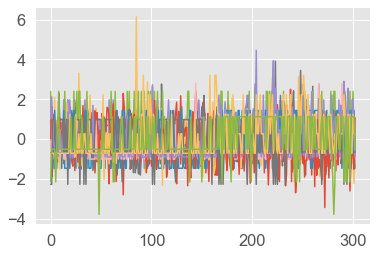

In [389]:
# scale features with Standard scaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
plt.plot(scaled_x);

In [390]:
pd.DataFrame(scaled_x, columns=X.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [391]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2)

In [392]:
# let's try linearSVC
from sklearn.svm import LinearSVC

np.random.seed(45)

lsvc = LinearSVC(max_iter=10000, dual=False)
lsvc.fit(x_train, y_train)
lsvc.score(x_test, y_test)

0.8524590163934426

### 2.2.1 Improve model

* first use KNeighborsClassifier
* second use RandomForestClassifier

In [393]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(45)

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
knc.score(x_test, y_test)

0.8360655737704918

In [394]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(45)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.7868852459016393

### tips

* If you have structure data, use ensemble
* If you have unstructure data, use deep learning or transfer learning

# 3. Fit model/algorithm to data and make prediction

### 3.1 Fitting the model to data

* X : features, feature variables, data
* y : labels, targets, target variables

In [395]:
from sklearn.ensemble import RandomForestClassifier

# get data ready
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(45)

# initiate RandomForestClassifier model
rfc = RandomForestClassifier()

# fit model to training data (training the machine learning model)
rfc.fit(x_train, y_train)

# evaluate RandomForestClassifier (use the patterns the model has learned)
rfc.score(x_test, y_test)

0.8360655737704918

### 3.2 Make prediction using the machine learning model

* predict()
* predict_proba()

In [396]:
# rfc.predict(np.array([1,2,3])) cause error as input is different shape

In [397]:
rfc.predict(x_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [398]:
np.array(y_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [399]:
pred = rfc.predict(x_test)
targets = np.array(y_test)
np.mean(pred==targets)

0.8360655737704918

In [400]:
rfc.score(x_test, y_test)

0.8360655737704918

In [401]:
from sklearn.metrics import accuracy_score

accuracy_score(targets, pred)

0.8360655737704918

use `predict_proba()`

In [402]:
rfc.predict_proba(x_test[:5])

array([[0.98, 0.02],
       [0.05, 0.95],
       [0.35, 0.65],
       [0.17, 0.83],
       [0.86, 0.14]])

In [403]:
rfc.predict(x_test[:5])

array([0, 1, 1, 1, 0])

In [404]:
x_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3


In [405]:
### Make prediction with Regression model

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# get data ready
X = boston_df.drop('Target', axis=1)
y = boston_df['Target']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# make result reproducible 
np.random.seed(43)

# initiate RandomForestRegressor model
rfr = RandomForestRegressor()

# fit model to training data
rfr.fit(x_train, y_train)

# evaluate model
rfr.score(x_test, y_test)

# predict
pred = rfr.predict(x_test)

np.array(y_test[:10])

array([20.7, 15.4, 24.7, 29.8, 13.5, 30.7, 19. , 18.6, 24.4, 23.2])

In [407]:
pred[:10]

array([21.61 , 15.256, 21.012, 29.135, 15.18 , 26.115, 19.448, 19.365,
       22.544, 21.854])

In [408]:
# compare prediction to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred)

2.7847941176470603

In [409]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 4. Evaluating a machine learning model

There are three ways to evalute scikit-learn model/estimator

1. Estimator `score` method
2. The `scoring` parameter
3. Problem-Specific metric function

## 4.1 Evalute model with `score` method

### classification problem

In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [411]:
rfc.score(x_train, y_train)

1.0

In [412]:
rfc.score(x_test, y_test)

0.8524590163934426

### Regression problem

In [413]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('Target', axis=1)
y = boston_df['Target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [414]:
rfr.score(x_train, y_train)

0.9763520974033731

In [415]:
rfr.score(x_test, y_test)

0.8654448653350507

## 4.2 Evalute the model with `scoring` parameter

In [416]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8524590163934426

In [417]:
# Model train 5 times with different data and generate 5 different scores
cross_val_score(rfc, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [418]:
# Model train 10 times with different data and generate 10 different scores
cross_val_score(rfc, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [419]:
# compare
single = rfc.score(x_test, y_test)
cross = np.mean(cross_val_score(rfc, X, y))
single, cross

(0.8524590163934426, 0.8281420765027322)

### Cross validation

Cross validation is aim to solve the problem that not training all the data

`cross_val_score()` try to train model 5 different times by default and each time it separate train & test data differently

<img src="sklearn-cross-validation.png" />

## 4.2.1 Classification evaluation metrice

* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report

### Accuracy

In [420]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [421]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

rfc = RandomForestClassifier()
cross_val_score(rfc, X, y)

array([0.78688525, 0.90163934, 0.78688525, 0.81666667, 0.8       ])

In [422]:
np.mean(cross_val_score(rfc, X, y))

0.8346994535519124

In [423]:
print(f'Heart Disease Classifier Cross-Validate Accuracy {np.mean(cross_val_score(rfc, X, y)) * 100:0.2f}%')

Heart Disease Classifier Cross-Validate Accuracy 81.82%


### Area under the receiver operating characteristic curve(AUC/ROC)

* Area under curve(AUC)
* RCO curve

ROC curves are a compareson of model's true positive rate(TPR) versus a model's false positive rate(FPR)

* True positive = model predict 1 with truth(label) is 1
* False positive = model predict 1 with truth(label) is 0
* True negative = model predict 0 with truth(label) is 0
* False negative = model predict 0 with truth(label) is 1

In [424]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [425]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_proba = rfc.predict_proba(x_test)

print(f'format [[0, 1]] \n\n {y_proba[:10]}')

format [[0, 1]] 

 [[0.8  0.2 ]
 [0.32 0.68]
 [0.17 0.83]
 [0.23 0.77]
 [0.28 0.72]
 [0.26 0.74]
 [0.3  0.7 ]
 [0.84 0.16]
 [0.52 0.48]
 [0.   1.  ]]


In [426]:
# get postive part which is 1 in each probabilities
y_proba_postive = y_proba[:,1]
y_proba_postive

array([0.2 , 0.68, 0.83, 0.77, 0.72, 0.74, 0.7 , 0.16, 0.48, 1.  , 0.77,
       0.05, 0.09, 0.05, 0.17, 0.52, 0.46, 0.77, 0.43, 0.04, 0.4 , 0.56,
       0.97, 0.35, 1.  , 0.04, 0.92, 0.06, 0.14, 0.64, 0.42, 0.23, 0.07,
       0.83, 0.83, 0.58, 0.87, 0.32, 0.75, 0.23, 0.02, 0.77, 0.73, 0.84,
       0.13, 0.79, 0.78, 0.35, 0.42, 0.54, 0.83, 0.75, 0.83, 0.61, 0.88,
       0.34, 0.65, 0.76, 0.47, 0.48, 0.95])

In [427]:
len(y_test), len(y_proba_postive)

(61, 61)

In [428]:
from sklearn.metrics import roc_curve

# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_postive)

fpr

array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.09375, 0.09375,
       0.09375, 0.09375, 0.15625, 0.15625, 0.25   , 0.25   , 0.28125,
       0.28125, 0.34375, 0.40625, 0.40625, 0.4375 , 0.46875, 0.5    ,
       0.5625 , 0.59375, 0.84375, 0.96875, 1.     ])

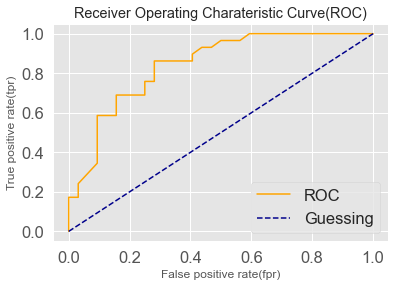

In [429]:
# create function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plot a ROC curve by given fpr(Flase positive rate)
    and tpr(True positive rate) of a model
    '''
    # plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], linestyle='--', color='darkblue', label='Guessing')
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Charateristic Curve(ROC)')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [430]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_postive)

0.8410560344827586

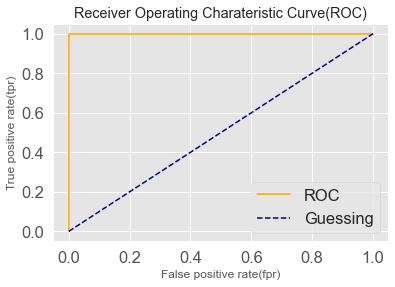

In [431]:
# perfect ROC curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [432]:
# perfect AUC curve score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

The confusion matrix is a quick way to compare a model predicts and the actual labels it was supposed to predicts

In essence, giving you an idea where a model getting confused

In [433]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[23,  9],
       [ 4, 25]])

In [434]:
pd.crosstab(y_test, y_pred, rownames=['Actual labels'], colnames=['Predict labels'])

Predict labels,0,1
Actual labels,,
0,23,9
1,4,25


In [435]:
23+9+4+25

61

In [436]:
len(y_test), len(y_pred)

(61, 61)

<img src="sklearn-confusion-matrix-anatomy.png"/>

In [437]:
# install seaborn into conda env from jupter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



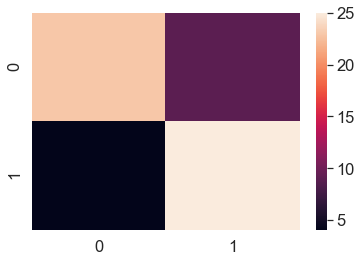

In [438]:
# Make our confusion matrix more visual in Seaborn's heatmap()
import seaborn as sns

# set font for seaborn
sns.set(font_scale=1.5)

# create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot it using seaborn
sns.heatmap(conf_matrix);

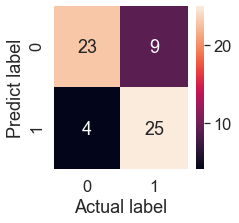

In [439]:
def plot_conf_mat(conf_mat):
    '''
    plot confustion matrix using seaborn heatmap
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=True)
    
#     ax.set(xlabel='Actual label', ylabel='Predict label')
    plt.xlabel('Actual label')
    plt.ylabel('Predict label')
    
plot_conf_mat(conf_matrix)

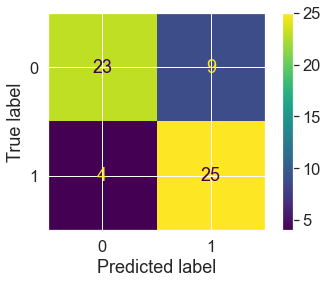

In [440]:
# plot with sklearn's plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, x_test, y_test)

### Classification Report

In [441]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [442]:
# where percison and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive

disease_pred = np.zeros(10000) # predict every cases as 0

pd.DataFrame(classification_report(disease_true, disease_pred, output_dict=True))

/Volumes/BOOTCAMP/MachineLearning/sample_project/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summerize classification mertices:
    
   * **Accuracy**: Is a good measure to start with if all classes are balanced(e.g same amount of smaples which are labelled with 0 or 1)
    
   * **Percision** and **Recall**: become more important when classes are inbalanced
   * if false positive predictions are worse than false negatives, aim for higher percision
   * if false negative predictions are worse than false positive, aim for higher recall
   * **F1-Score**: is a combination of percision and recall

## 4.2.2 Regression model evaluation metrices

model evaluation metrices documentation (https://scikit-learn.org/stable/modules/model_evaluation.html)

* R^2 (R-square) or coefficient of determination
* Mean absolute error(MAE)
* Mean square error(MSE)

### R^2

What R^2 does: Compare model's predictions to the mean of targets. Values can range from negative infinity(a poor model) to 1. For example, if all your model is predict the mean of targets, it's R^2 values is 0. If your model perfectly predict a range of numbers, it R^2 values is 1

In [443]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop('Target', axis=1)
y = boston_df['Target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr.score(x_test, y_test)

0.7913395646253987

In [444]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79117647,
       22.79117647, 22.79117647, 22.79117647, 22.79117647, 22.79

In [445]:
r2_score(y_test, y_test_mean)

0.0

In [446]:
r2_score(y_test, y_test)

1.0

In [447]:
y_pred = rfr.predict(x_test)
r2_score(y_test, y_pred)

0.7913395646253987

### Mean Absolute Error (MAE)

MAE is the average of absolute difference between actual values and predict values. It give you an idea how wrong your model predictions are

In [448]:
from sklearn.metrics import mean_absolute_error

np.random.seed(42)

y_pred = rfr.predict(x_test)
mean_absolute_error(y_test, y_pred)

2.5103431372549014

In [449]:
df = pd.DataFrame(data={'actual values':y_test, 'predict values':y_pred})
df['difference'] = df['actual values'] - df['predict values']
df.head()

,actual values,predict values,difference
57,31.6,30.490,1.110
39,30.8,27.661,3.139
322,20.4,21.958,-1.558
281,35.4,33.544,1.856
280,45.4,47.345,-1.945


### Mean Square Error (MSE)

Square of difference between model's prediction value and target's value. It give you an idea how wrong your model predictions are but yield more punishment

In [450]:
from sklearn.metrics import mean_squared_error

np.random.seed(42)

y_pred = rfr.predict(x_test)
mean_squared_error(y_test, y_pred)

16.42383073529413

In [451]:
# calculate MSE manually
square = np.square(df['difference'])
square.mean()

16.42383073529413

##  4.2.3 using ```Scoring``` parameter

### Classification

In [452]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

rfc = RandomForestClassifier()

cross_acc = cross_val_score(rfc, X, y, scoring=None)

In [453]:
print(f'The cross-validated accuracy is: {np.mean(cross_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [454]:
# accuracy
np.random.seed(42)
cross_acc = cross_val_score(rfc, X, y, scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cross_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [455]:
# precision
np.random.seed(42)
cross_precision = cross_val_score(rfc, X, y, scoring='precision')
print(f'The cross-validated precision is: {np.mean(cross_precision)*100:.2f}%')

The cross-validated precision is: 83.30%


In [456]:
# recall
np.random.seed(42)
cross_recall = cross_val_score(rfc, X, y, scoring='recall')
print(f'The cross-validated recall is: {np.mean(cross_recall)*100:.2f}%')

The cross-validated recall is: 85.45%


In [457]:
# F1-Score
np.random.seed(42)
cross_f1 = cross_val_score(rfc, X, y, scoring='f1')
print(f'The cross-validated f1 is: {np.mean(cross_f1)*100:.2f}%')

The cross-validated f1 is: 84.27%


### Regression

In [458]:
# Regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('Target', axis=1)
y = boston_df['Target']

rfr = RandomForestRegressor()

cv_r2 = cross_val_score(rfr, X, y, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [459]:
# R^2
np.random.seed(42)

cv_r2 = cross_val_score(rfr, X, y, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [460]:
# mean absolute error
np.random.seed(42)

cv_mae = cross_val_score(rfr, X, y, scoring='neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [461]:
# mean squared error
np.random.seed(42)

cv_mse = cross_val_score(rfr, X, y, scoring='neg_mean_squared_error')
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [462]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_preds = rfc.predict(x_test)

print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%')
print(f'F1 score: {f1_score(y_test, y_preds)*100:.2f}%')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1 score: 86.15%


In [463]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('Target', axis=1)
y = boston_df['Target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

y_preds = rfr.predict(x_test)

print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving Model

First predictions = baseline predictions. 

First model = baseline model.

From data perspective: 
* Could we collection more data?(generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there better model we could use?
* Could we improve current model?

Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
1. Randomly with RandomSearchCV
1. Exhaustively with GridSearchCV


In [464]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, Training, Validation, Test

we are going to try and adjust:
* ``max_depth``
* ``max_features``
* ``min_samples_leaf``
* ``min_sample_split``
* ``n_estimators``

In [465]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    '''
    Perform evaluation comparsion on y_true labels and y_preds labels
    on a classification 
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1': round(f1, 2)
    }
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'precision: {precision:.2f}')
    print(f'recall: {recall:.2f}')
    print(f'f1: {f1:.2f}')
    
    return metric_dict

In [466]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#shuffled data
heart_disease_shuffled = heart_disease.sample(frac=1)

# X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split data into training, validation and test
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

x_train, y_train = X[:train_split], y[:train_split]
x_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = X[valid_split:], y[valid_split:]

# splite data into training, validation and test easier way
# #first splite into 0.7 on training and 0.3 on test
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# #second spite rest of test into 0.15 on validation and 0.15 on test
# x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.15)



# init model
rfc = RandomForestClassifier()

# fit model into training data
rfc.fit(x_train, y_train)

# make baseline predictions
y_preds = rfc.predict(x_valid)

# evalutate classifier on validaion on
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [471]:
# max_depth

# init model with different hyperparameter of max_depth
rfc_2 = RandomForestClassifier(max_depth=10)

# fit model into training data
rfc_2.fit(x_train, y_train)

# make prediction
y_preds = rfc_2.predict(x_valid)


rfc_2_metrics = evaluate_preds(y_valid, y_preds)
rfc_2_metrics

Accuracy: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}